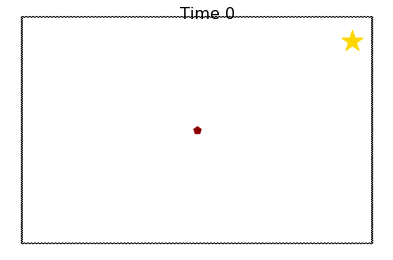

In [1]:
import visualize as vs
import numpy as np
from ltts import LTTS
from env import Reach

# Here we define our model
N, I, O, T = 100, 2, 2, 100;

dt = 1 / T;
tau_m = 2. * dt;
tau_s = 2. * dt;
tau_ro = 5. * dt;
beta_s  = np.exp (-dt / tau_s);
beta_ro = np.exp (-dt / tau_ro);
sigma_teach = 0.;
sigma_input = 10.;
offT = 1;
dv = 1 / 5.;
alpha = .1;
alpha_rout = .1;
Vo = -4;
h = -4;
s_inh = 20;

# Here we build the dictionary of the simulation parameters
par = {'tau_m' : tau_m, 'tau_s' : tau_s, 'tau_ro' : tau_ro, 'beta_ro' : beta_ro,
	   'dv' : dv, 'alpha' : alpha, 'Vo' : Vo, 'h' : h, 's_inh' : s_inh,
	   'N' : N, 'T' : T, 'dt' : dt, 'offT' : offT, 'alpha_rout' : alpha_rout,
	   'sigma_input' : sigma_input, 'sigma_teach' : sigma_teach};

# Here we define target and initial position
targ1 = np.array ((.9, 0.8));
targ2 = np.array ((.2, 0.6));

init = np.array ((0., 0.));

# Here we init the environment
env = Reach (max_T = T, targ = targ1, init = init);

# Here we init our model
ltts = LTTS ((N, I, O, T), par);

ltts.J = ltts.J*0;

# Based on this information we compute the expert trajectory input-output and
# produce a network behaviour to clone
steps = 80;

targets = [np.random.uniform (-1, 1, size = 2) for _ in range (1)];

inits = [np.random.uniform (-0.5, 0.5, size = 2) for _ in range (1)];

experts = [env.build_expert (targ, init) for targ, init in zip (targets, inits)];

itargets = [ltts.implement (exp)[0] for exp in experts];

inputs = [ltts.implement (exp)[1] for exp in experts];

# out += np.random.uniform (-0.05, 0.05, size = out.shape);

# Here we clone this behaviour



In [2]:

ltts.clone ( experts , itargets , epochs = 0);
ex_test = 0;
S_gen, action = ltts.compute (inputs[ex_test]);

print(  np.sum(np.abs(S_gen - itargets[0])) )

0.0


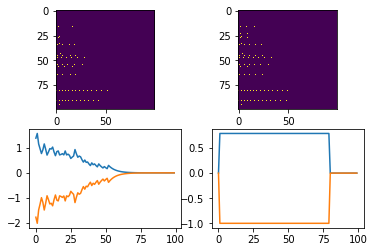

In [18]:
import matplotlib.pyplot as plt

# Here we test the resulting behaviour



#vs.cloning_plot ((itargets[0] , experts[0][1]), (S_gen, action), save = 'test-raster.png');

plt.subplot(221)
plt.imshow(S_gen)


plt.subplot(222)
plt.imshow(itargets[ex_test])


plt.subplot(223)
plt.plot(action[0,:])
plt.plot(action[1,:])

plt.subplot(224)
plt.plot(experts[ex_test][1][0,:])
plt.plot(experts[ex_test][1][1,:])



plt.show()

<Figure size 432x288 with 0 Axes>

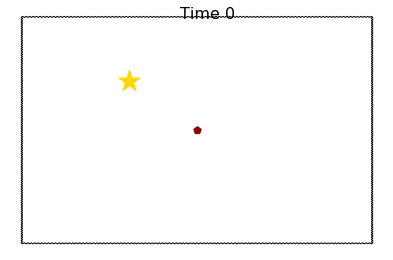

In [18]:
# Here we move the target
# targ /= 1.1

#ltts.J = ltts.J*0.
import matplotlib.pyplot as plt
import random as rd


#targ_ = np.array ( ( (rd.random()-.5)*2 , (rd.random()-.5)*2 ));


obv = init
obv_h = [init]
act_h = []

env.t = 0;

ltts.t=0; 
ltts.S = ltts.S*0;
ltts.S_hat = ltts.S_hat*0;


plt.figure()

T = 100


env.targ = targ_
env.T = T
env.init = (.0, .0)

env = Reach (max_T = 500, targ = targ_, init = init);

S_h = [np.zeros (N)]
obv_h = [init]
act_h = []


T_test = 100

traj = np.zeros((2,T_test-1));
dpos = np.zeros((2,T_test-1));


for t in range (T_test-1):
	action, S = ltts.step (obv, t);
	obv, r, done, agen = env.step (action / steps);

	obv_h.append (obv.copy ());
	act_h.append (action);
	S_h.append (S);

	#fig = env.render ();
    
	traj[:,t] = agen;
	dpos[:,t] = obv;    




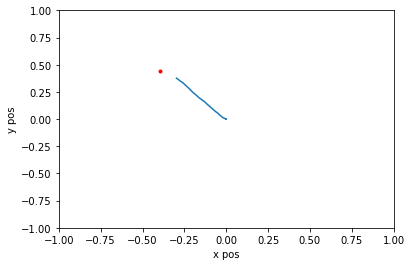

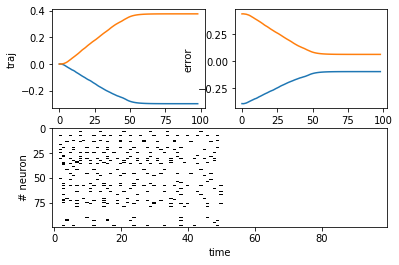

In [19]:
plt.figure()
plt.plot(traj[0,:],traj[1,:])
plt.plot(targ_[0],targ_[1],'r.')
plt.xlim((-1,1))
plt.ylim((-1,1))


plt.xlabel('x pos')
plt.ylabel('y pos')

plt.figure()

plt.subplot(221)
plt.plot(traj[0,:])
plt.plot(traj[1,:])
plt.ylabel('traj')
plt.xlabel('time')

plt.subplot(222)

plt.plot(dpos[0,:])
plt.plot(dpos[1,:])
plt.xlabel('time')
plt.ylabel('error')

plt.subplot(212)
plt.imshow(np.transpose(S_h), aspect = 'auto', cmap = 'binary');

plt.xlabel('time')
plt.ylabel('# neuron')

plt.show()


In [20]:
np.max(ltts.J)

37.63909023890136